
# Lending Club Case Study

This case study is created to solve and understand the real world problems faced by a Lending Club.

Here we will be working on the data provieded to us.

As we go through the steps to get an understand of data analisys and data processing and get some insight into risks and issues faced by a Lending Club.

## Our plan of action:
Before we start visualizing and drawing consultions we must:
1. Understanding the data: This involves ,
* seeing the raw data.
* finding the columns that might be of interest.
* seeing the values held by a column.
2. Cleaning the data: This would involve ,
* Dropping columns that dont have any values.
* Dropping columns that dont add any value to the data set.
* standardization of the values in the data set.
* Replace the null values if that can be done depending on the column.
3. Create new columns : We will now create columns that might give us a deeper insight into the data and help create more segmenting atributes .

### So lets get into it!


#### Imports needed

In [145]:
import numpy as np # Math Functions
import pandas as pd #Data managment and processing 
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization 
import plotly.express as px # Advanced Data visualization 
import warnings # Avoid warings that might arrise from data visualization
warnings.filterwarnings('ignore')

#### Loading the data into a data set .

In [146]:
LC_Data = pd.read_csv("Data\loan.csv" ,index_col=False,dtype="unicode") 
LC_Data.head() #View the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [147]:
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 112)
LC_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

### Cleaning the Data
#### Dropping columns 

In [148]:
# first lets find the total no. of rows
LC_Data.shape


(39717, 111)

In [149]:
# lets find all the columns with null values
LC_Data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

In [150]:
# as we see there are many columns with 0 non-null Values theya re of no use.
# we need to find the names of all the columns with 100% null values
null_percent = LC_Data.isnull().sum() * 100 / len(LC_Data)
missing_data=pd.DataFrame({"Column":LC_Data.columns,"Null_Percent":null_percent.round(1)})
missing_data.sort_values("Null_Percent",inplace=True, ascending= False)
# Lets manke a list of all the columns that have only null values
null_column = missing_data[missing_data['Null_Percent']==100.0].Column.tolist()
len(null_column)

54

In [151]:
# As we see we have 54 Columns that have no data we can drop them 
LC_Data_Nullcol_Dropped = LC_Data.drop(null_column,axis =1)
LC_Data_Nullcol_Dropped.shape

(39717, 57)

In [152]:
# Dropping Columns that dont add any value 
LC_Data_Nullcol_Dropped= LC_Data_Nullcol_Dropped.drop(["url","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","pymnt_plan"],axis=1)
LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39717 non-null  object
 1   member_id                39717 non-null  object
 2   loan_amnt                39717 non-null  object
 3   funded_amnt              39717 non-null  object
 4   funded_amnt_inv          39717 non-null  object
 5   term                     39717 non-null  object
 6   int_rate                 39717 non-null  object
 7   installment              39717 non-null  object
 8   grade                    39717 non-null  object
 9   sub_grade                39717 non-null  object
 10  emp_title                37258 non-null  object
 11  emp_length               38642 non-null  object
 12  home_ownership           39717 non-null  object
 13  annual_inc               39717 non-null  object
 14  verification_status      39717 non-nul

In [153]:
# Dropping Columns that would not be present for us while applying for the loan as the main perpose of the 
# case study is to find driving factors for defaulters we cannot use the data in these columns :
col_list=['delinq_2yrs','sub_grade','grade','earliest_cr_line','last_pymnt_amnt','last_pymnt_d','recoveries',
          'mths_since_last_record','mths_since_last_delinq','collection_recovery_fee','total_rec_late_fee','next_pymnt_d'
          ,'out_prncp','out_prncp_inv','last_credit_pull_d']
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop(col_list,axis = 1)
# Dropping data that cannot be used for analysis (unique to row)
LC_Data_Nullcol_Dropped = LC_Data_Nullcol_Dropped.drop(["id","member_id","desc",],axis=1)

# look at % of nulls again 
null_percent = LC_Data_Nullcol_Dropped.isnull().sum() * 100 / len(LC_Data_Nullcol_Dropped)
missing_data=pd.DataFrame({"Column":LC_Data_Nullcol_Dropped.columns,"Null_Percent":null_percent.round(1)})
missing_data.sort_values("Null_Percent",inplace=True, ascending= False)
missing_data

,Column,Null_Percent
emp_title,emp_title,6.2
emp_length,emp_length,2.7
pub_rec_bankruptcies,pub_rec_bankruptcies,1.8
revol_util,revol_util,0.1
addr_state,addr_state,0.0
total_rec_int,total_rec_int,0.0
total_rec_prncp,total_rec_prncp,0.0
total_pymnt_inv,total_pymnt_inv,0.0
total_pymnt,total_pymnt,0.0
total_acc,total_acc,0.0


In [154]:
# Dropping all rows with current loan status as they are inconculsive in nature.i.e nither fully paid nor charged off
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped[LC_Data_Nullcol_Dropped.loan_status !='Current']
# Dropping emp_title as there are almost all unique values and high null values
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop('emp_title',axis=1)
# we will fill the emp length null values once we can fix the data type and data display.

#### Data Type correction:

In [155]:
# Setting the data type of each column and standerdizing the data 
columns=['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc','dti', 'total_pymnt', 'total_pymnt_inv','pub_rec_bankruptcies']
LC_Data_Nullcol_Dropped[columns]=LC_Data_Nullcol_Dropped[columns].astype(float)
LC_Data_Nullcol_Dropped.term = LC_Data_Nullcol_Dropped.term.apply(lambda x: int(x.replace(" months","")))
LC_Data_Nullcol_Dropped.int_rate=LC_Data_Nullcol_Dropped.int_rate.apply(lambda x:float(x[:-1]))
LC_Data_Nullcol_Dropped.issue_d=pd.to_datetime(LC_Data_Nullcol_Dropped.issue_d.str.upper(), format='%b-%y', yearfirst=False)
LC_Data_Nullcol_Dropped.inq_last_6mths=LC_Data.inq_last_6mths.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.open_acc=LC_Data_Nullcol_Dropped.open_acc.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.total_acc=LC_Data_Nullcol_Dropped.total_acc.apply(lambda x : int(x))

In [156]:
#emp Length is defined in a way that will not allow for analisys so we will try to standerdize it 
#here 10+ years will be taken as 10
#here <1 will be 0.5
def emp_length_func(y):
    y=str(y)
    l=y.split(" y")
    if l[0] == "< 1":
        return 0.5
    elif l[0] =="10+":
        return 10
    elif l[0] == "nan":
        return None
    else:
        return int(l[0])

LC_Data_Nullcol_Dropped.emp_length= LC_Data_Nullcol_Dropped.emp_length.apply(emp_length_func)

LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   emp_length            37544 non-null  float64       
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  title           

In [157]:
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop('title',axis=1) #since title is just a sub category of Purpose of loan
#Look For duplicates in our data set
LC_Data_Nullcol_Dropped[LC_Data_Nullcol_Dropped.duplicated()]
# We have no duplicates

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies


In [158]:
#Setting Categoric data 
col = [ 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'open_acc']
LC_Data_Nullcol_Dropped[col] = LC_Data_Nullcol_Dropped[col].apply(lambda x: x.astype('category'))


In [159]:
# Filling  in null values of emp length with the median 
LC_Data_Nullcol_Dropped.emp_length.fillna(LC_Data_Nullcol_Dropped.emp_length.median(skipna = True),inplace = True)
# Filling in numm Vlaues for pub_rec_bankruptcies
LC_Data_Nullcol_Dropped.pub_rec_bankruptcies.fillna(LC_Data_Nullcol_Dropped.pub_rec_bankruptcies.median(skipna=True),inplace= True)


In [160]:
# Now that we have all the columns set in the right format we can keep that and copy and we have our final data frame for EDA
Data_LC = LC_Data_Nullcol_Dropped.copy(deep= True)
#Create a CSV that dropped out side the notebook to have a check point
LC_Data_Nullcol_Dropped.to_csv("Final_Data_for_EDA.csv", index=False,mode='w+')
# From this point on we will not be dropping any more columns 

#### Adding columns to the data to ease the EDA

In [161]:
Data_LC['Year']=pd.DatetimeIndex(Data_LC['issue_d']).year
Data_LC["Loan_Inc_Ratio"]=Data_LC.funded_amnt/(Data_LC.annual_inc)
Data_LC['Loan_applied2Funded']=Data_LC.funded_amnt_inv/Data_LC.loan_amnt
Data_LC['monthly_inc']=Data_LC.annual_inc/12
Data_LC['installment_mon_inc']=Data_LC.installment/Data_LC.monthly_inc


#### Lets make the state more readable by replacing the abrivations with full names 

In [162]:
states = {
    'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
    'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho',
    'IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland',
    'ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MS': 'Mississippi','MT': 'Montana','NC': 'North Carolina',
    'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada',
    'NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','RI': 'Rhode Island','SC': 'South Carolina',
    'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VT': 'Vermont','WA': 'Washington',
    'WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}
Data_LC.addr_state=Data_LC.addr_state.apply(lambda x : states[x])
Data_LC.addr_state.value_counts()

California              6949
New York                3698
Florida                 2781
Texas                   2659
New Jersey              1790
Illinois                1478
Pennsylvania            1468
Virginia                1369
Georgia                 1359
Massachusetts           1297
Ohio                    1178
Maryland                1023
Arizona                  849
Washington               818
Colorado                 766
North Carolina           750
Connecticut              726
Michigan                 704
Missouri                 670
Minnesota                605
Nevada                   479
South Carolina           459
Wisconsin                440
Alabama                  435
Oregon                   435
Louisiana                427
Kentucky                 311
Oklahoma                 287
Kansas                   255
Utah                     252
Arkansas                 235
District of Columbia     211
Rhode Island             194
New Mexico               183
West Virginia 

In [163]:
# List out the number of unique values in each column to see what ca be used to univariant analisys
Data_LC.nunique().sort_values()

loan_status                 2
term                        2
verification_status         3
pub_rec_bankruptcies        3
home_ownership              5
pub_rec                     5
Year                        5
inq_last_6mths              9
emp_length                 11
purpose                    14
open_acc                   40
addr_state                 50
issue_d                    55
total_acc                  82
int_rate                  370
zip_code                  822
loan_amnt                 870
funded_amnt              1019
revol_util               1088
dti                      2853
monthly_inc              5215
annual_inc               5215
total_rec_prncp          6841
funded_amnt_inv          8050
Loan_applied2Funded      9712
Loan_Inc_Ratio          13196
installment             15022
revol_bal               21275
total_rec_int           34025
installment_mon_inc     36280
total_pymnt_inv         36387
total_pymnt             36714
dtype: int64

#### Univariant Analisys

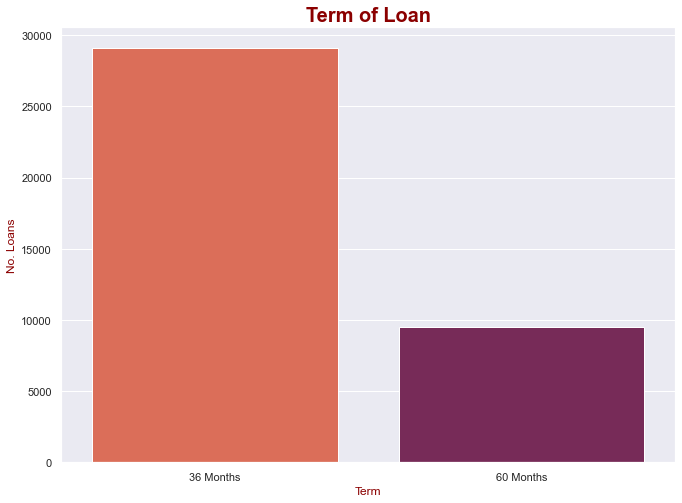

In [164]:
# See the count of each value in "term"
sns.countplot(x= Data_LC['term'],palette="rocket_r")
values=Data_LC['term'].unique()
update=[str(x)+" Months" for x in values]
font={'color':'darkred','weight':'heavy','size':20}
font2={'color':'darkred','weight':'normal','size':12}
plt.title("Term of Loan",fontdict=font)
plt.xlabel("Term",fontdict=font2)
plt.ylabel("No. Loans",fontdict=font2)
plt.xticks([0,1],update)

plt.show()

Most Loans are of 3 Years

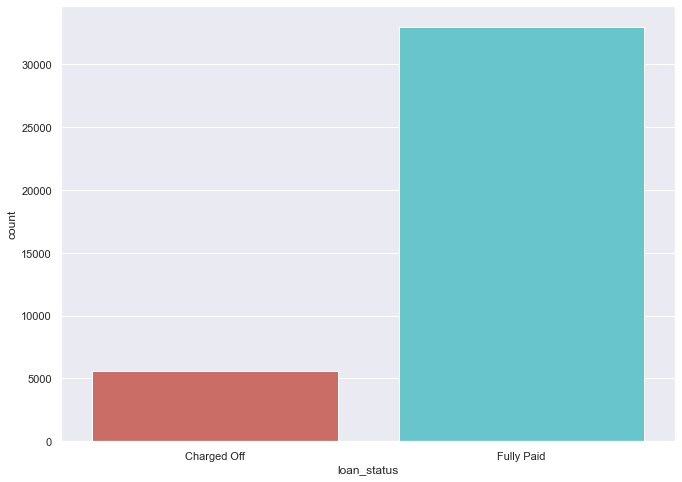

In [165]:
#Visualize Loan Status
sns.countplot(x= Data_LC['loan_status'],palette="hls")
plt.show()

* Most loans are paid off
* 14%-15% of the loans are the defaulters 

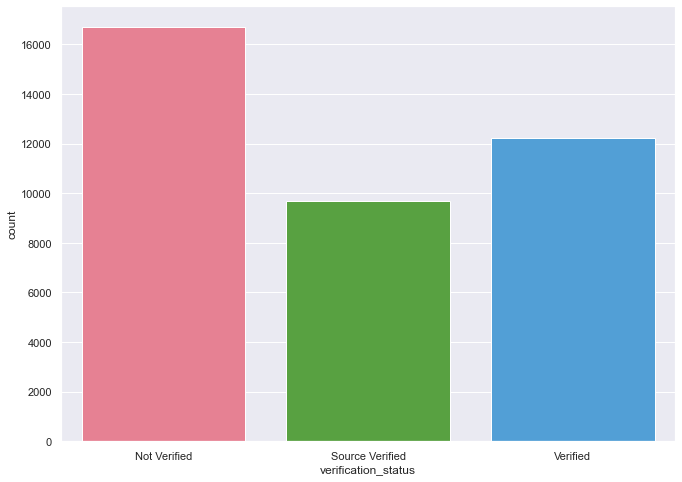

In [166]:
# visualize Verification status
sns.countplot(x= Data_LC['verification_status'],palette="husl")
plt.show()

* 40% -45% of the loans are unverified

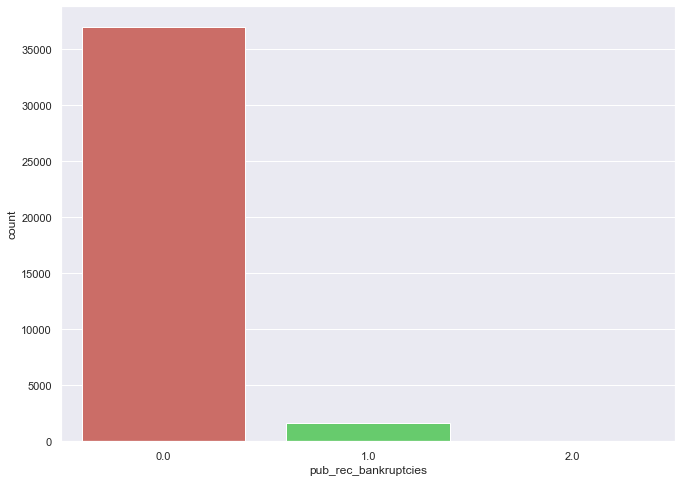

In [167]:
# visualize public bankrupcy
sns.countplot(x= Data_LC['pub_rec_bankruptcies'],palette="hls")
plt.show()

A very very small percentage of people have ever filed for  bankrupcy

In [168]:
#looking a funded loan amount to understand its values i.e amount actually given as loan
Data_LC.funded_amnt_inv.describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

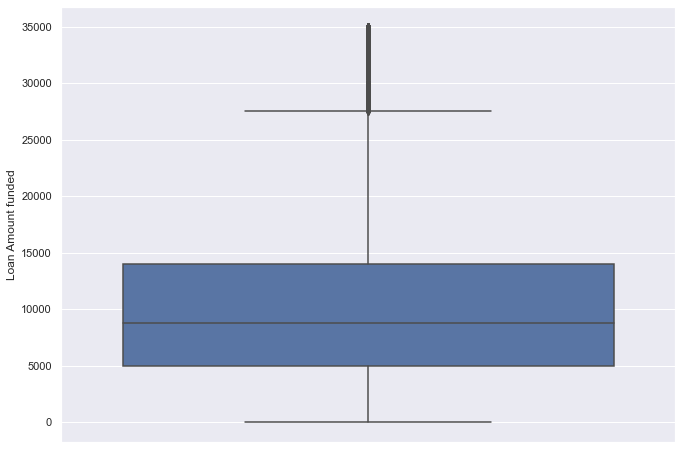

In [169]:
#Since the mean and median are not similar lets look at the box plot
sns.boxplot(y=Data_LC.funded_amnt_inv)
plt.ylabel("Loan Amount funded")
plt.show()

 Looks Like we have outliers from 30,000 onwards

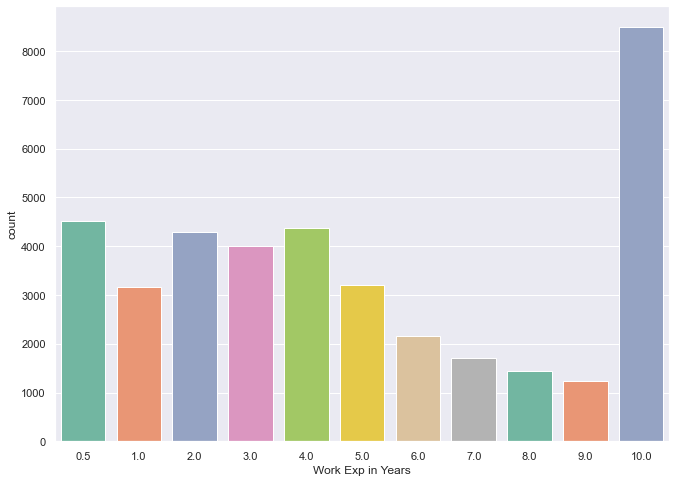

In [170]:
#Analysis of work exp of loan applicants
sns.countplot(x=Data_LC.emp_length,palette='Set2')
plt.xlabel("Work Exp in Years")
plt.show()

* Majority of loan aplicants have Work Exp of 10 years or more
* Least number of people who applied for the loan are with work exp between 6-9 years

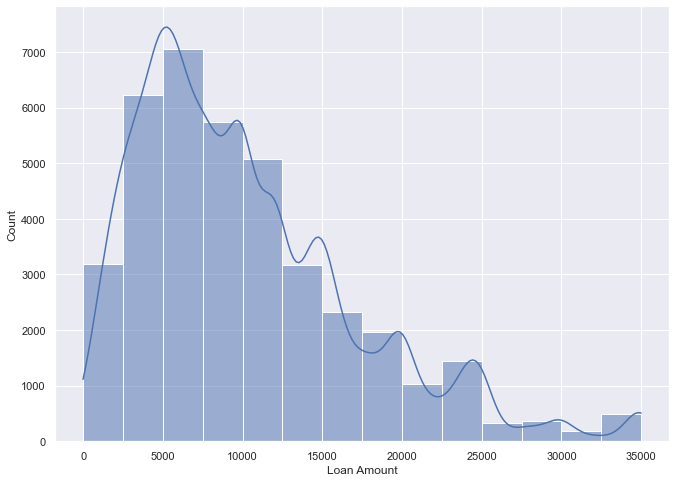

In [171]:
# analysis of loan amount
sns.histplot(data=Data_LC,x="funded_amnt_inv",bins=14,kde=True,)
plt.xlabel("Loan Amount")
plt.show()

Most common Loan Amount funded is in the range of 5000-7500

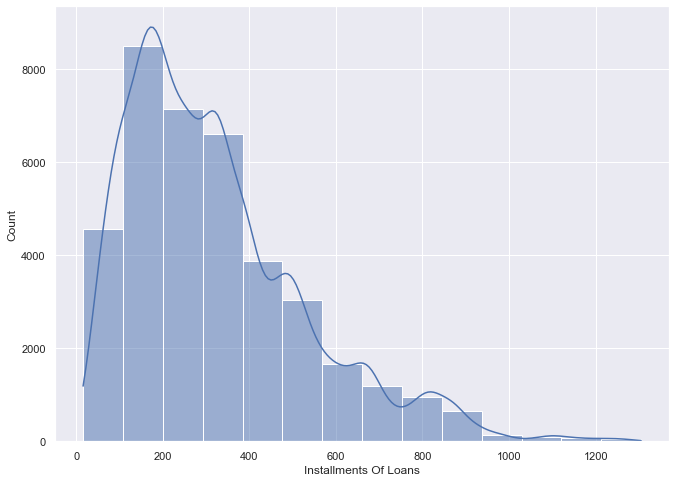

In [172]:
#analisys of Installment Column
sns.histplot(data=Data_LC,x="installment",bins=14,kde=True)
plt.xlabel("Installments Of Loans")
plt.show()

Here we can see most of the applicants pay between  100 - 200  as installment

In [173]:
#analisys of annual income
Data_LC.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

There is a huge gap between 75% and max which means there are huge outliers we need to see it more closely

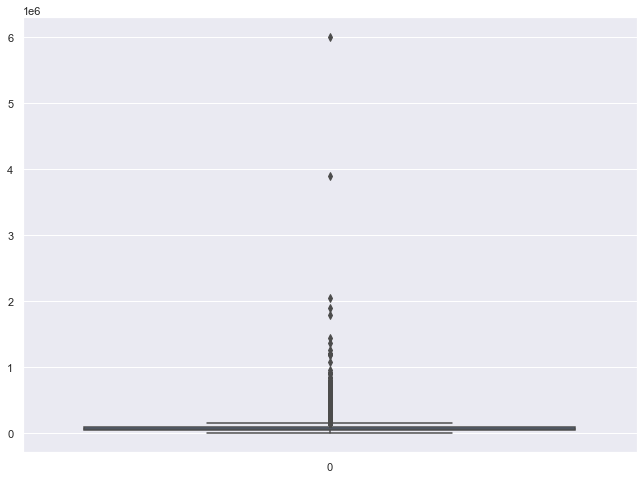

In [174]:
sns.boxplot(data=Data_LC.annual_inc)
plt.yscale='log'
plt.show()

Box plot Shows us extrem outliers are present making the data heavyly influcened by the outliers

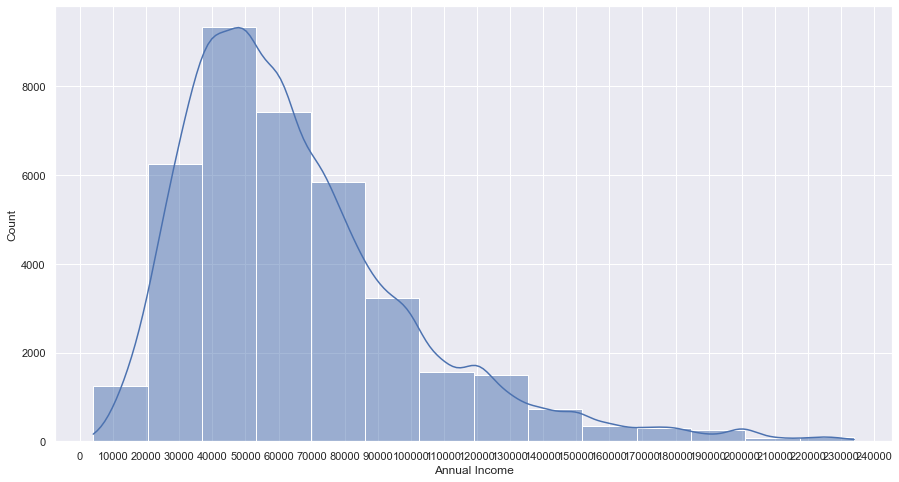

386 records left out as outliers for this plot that is the last 1%


In [175]:
# Lets look at the this column pulling out some of the out liers
ann_inc_no_out=Data_LC.annual_inc[Data_LC.annual_inc<np.percentile(Data_LC.annual_inc,99)]
diff=len(Data_LC.annual_inc)-len(ann_inc_no_out)
plt.figure(figsize=(15,8))
sns.histplot(x=ann_inc_no_out,bins=14,kde=True)

plt.xlabel("Annual Income")
plt.xticks(list(range(0,250000,10000)))
plt.show()
print(diff,"records left out as outliers for this plot that is the last 1%")


Removing the outliers we get a graph that shows us that most of the applicants have an annual income between 40,000 and 50,000

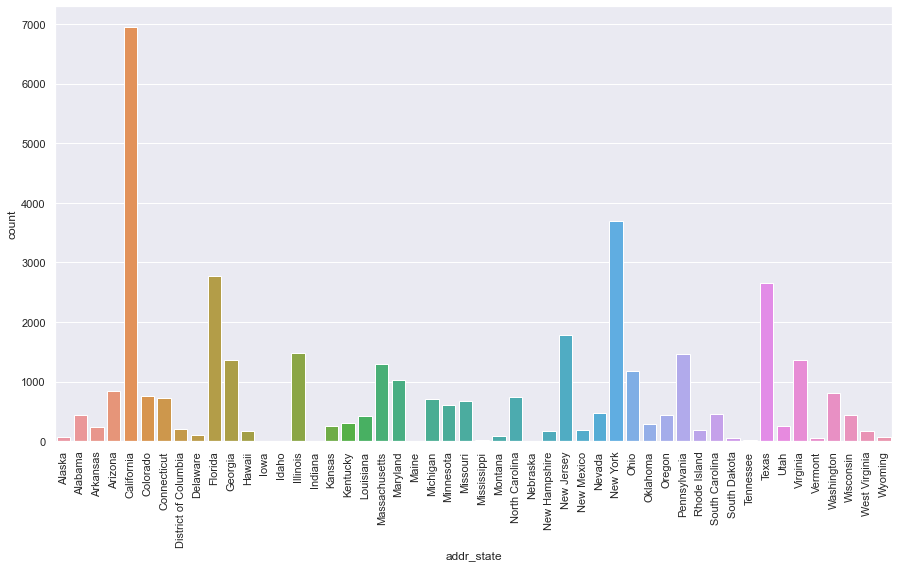

In [176]:
#analisys of the states that applied for the most loans
plt.figure(figsize=(15,8))
sns.countplot(x=Data_LC.addr_state)
plt.xticks(rotation=90)
plt.show()

Largest Number of Loan aplicants are from California

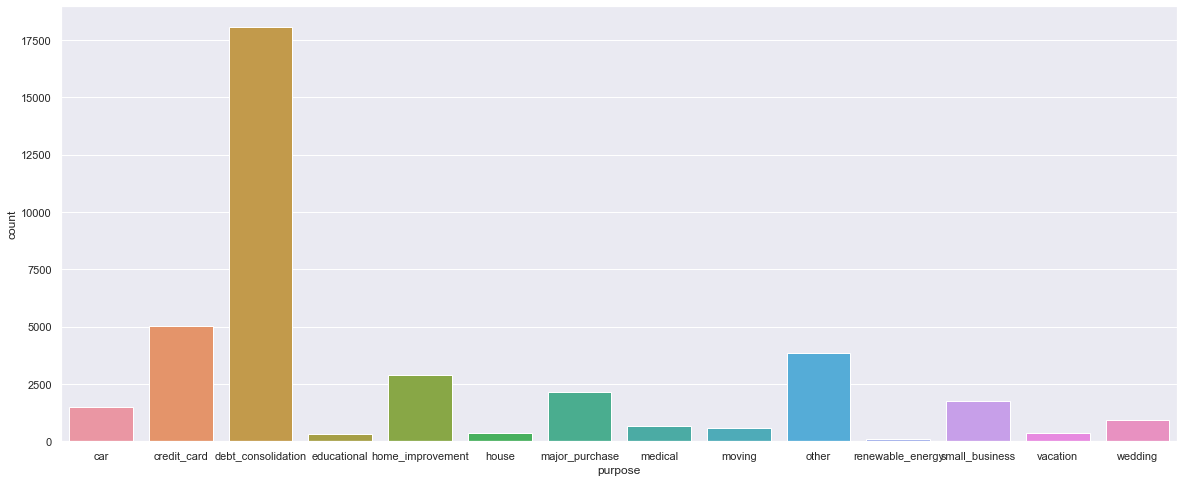

In [177]:
# analisys of Purpose of loan
plt.figure(figsize=(20,8))
sns.countplot(x=Data_LC.purpose)
plt.show()

Most common reason to take loan is to consolidate debt into a single loan

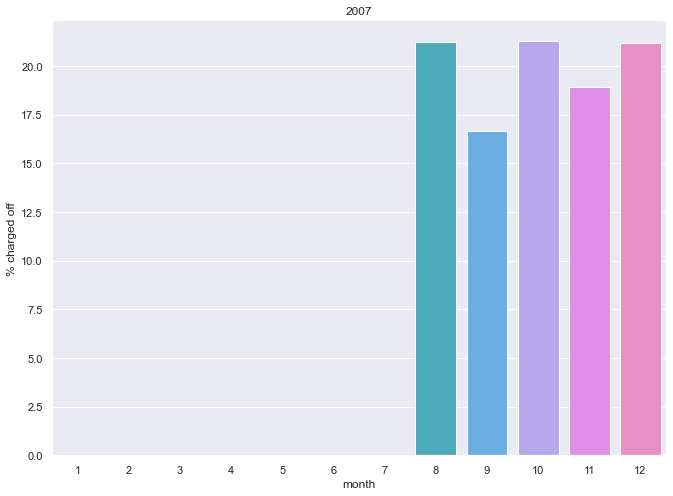

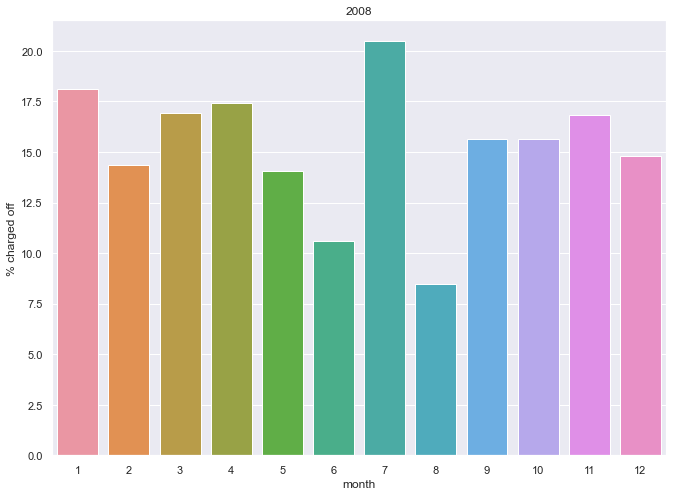

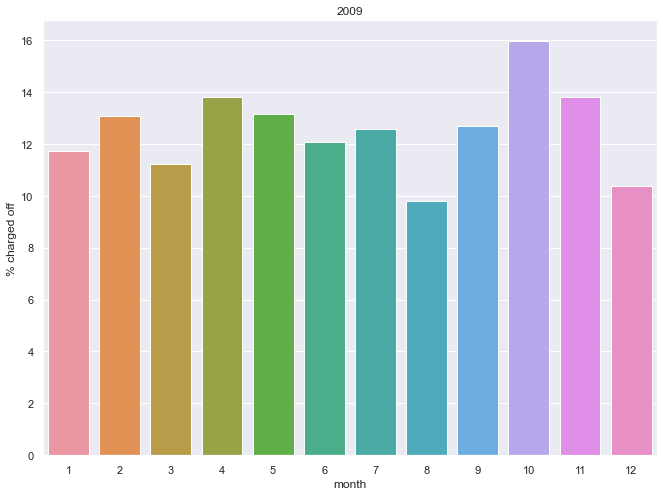

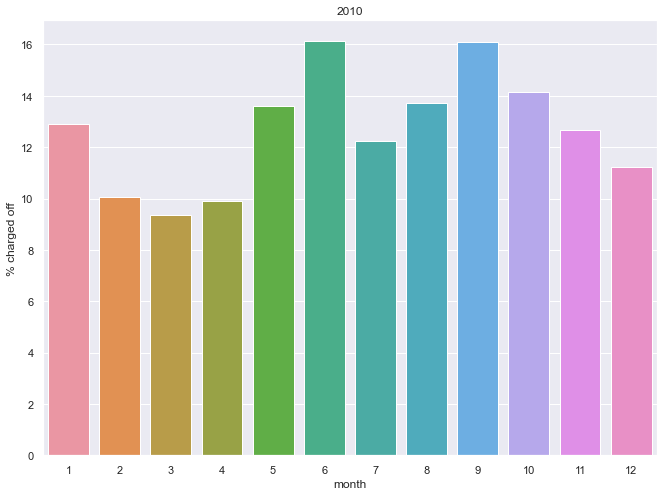

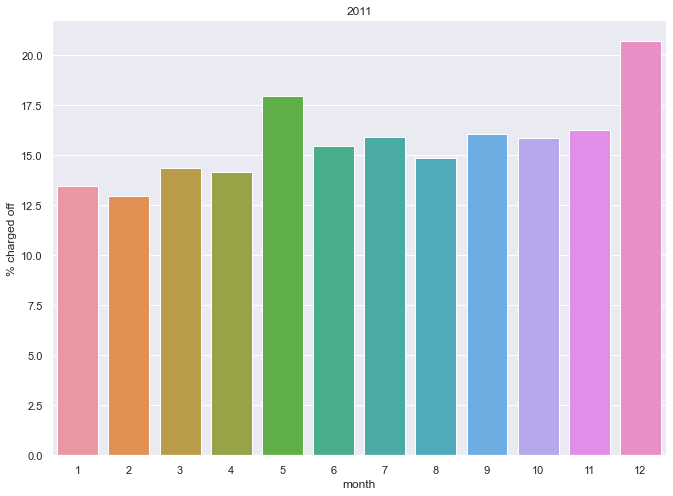

In [178]:
year_wise = pd.DataFrame()
year_list = []
month_list =[]
issued_list =[]
charge_off_list = []
percent_charged_off_list =[]

for year in range(2007,2012):
    for month in range(1,13):
        year_list.append(year)
        month_list.append(month)
        charge_off = Data_LC[(Data_LC['Year'] == year) & (pd.DatetimeIndex(Data_LC['issue_d']).month == month) & (Data_LC.loan_status == 'Charged Off')].funded_amnt.count()
        issued = Data_LC[(Data_LC['Year'] == year) & (pd.DatetimeIndex(Data_LC['issue_d']).month == month)].funded_amnt.count()
        charge_off_list.append(charge_off)
        issued_list.append(issued)
        percent_charged_off_list.append(round(charge_off/issued*100,2))

year_wise['year'] = year_list
year_wise['month'] = month_list
year_wise['issued']= issued_list
year_wise['charged off'] = charge_off_list
year_wise['% charged off'] = percent_charged_off_list

for year in range(2007,2012):
    plt.title(year)
    yearly_ds = year_wise[year_wise.year == year]
    sns.barplot(data = yearly_ds,x = yearly_ds.month, y = yearly_ds['% charged off'])
    plt.show()

* our data stats from Aug of 2007
* of all the loans issued in 2008 July seems to have had the highest charge off number 
* in all the tables we see loans given in the middle of the year seem to have a higher Default number, if the holds any value 
  needs to be seen further

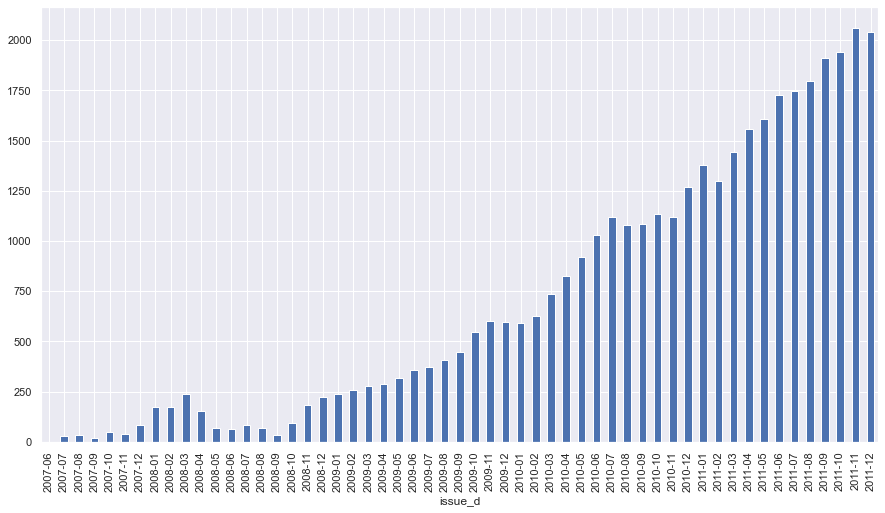

In [179]:
month= Data_LC.issue_d.unique()
month=[str(x)[:7] for x in month ]
r=list(range(len(month)))
monthly = Data_LC.groupby(by = 'issue_d').funded_amnt.count()
plt.figure(figsize=(15,8))
monthly.plot(kind ='bar')
plt.xticks(r,month[::-1])
plt.show()

#We can see that there is a dip in the number of loans around 2008 Sep, Oct timeperiod and after that it starts to rise and expands very rapidly
#What could explain this dip in the number of loans...the 2008 Financial Crisis?

#### We can see that the data is very bias as a few segments hold large number of loans we might have to look at percentages 
Lets make a custom funtion that can be called to dispay % of charged off loans vs any columns as a percent of all the loans .

In [180]:
def plotperc(colname,pvt= False,plot=True):
    if colname not in Data_LC.columns:
        out=" Expected values",list(Data_LC.columns)
        raise TypeError(out)
        return None
    else:
        pvt_tbl=pd.pivot_table(data=Data_LC,index=colname,columns=Data_LC.loan_status,values = 'loan_amnt', aggfunc = 'count')
        pvt_tbl['perc']=round(100*pvt_tbl['Charged Off']/(pvt_tbl['Charged Off']+pvt_tbl['Fully Paid']))
        
        if plot:
            plt.figure(figsize=(12,6))
            sns.barplot(data=pvt_tbl,x=pvt_tbl.index,y='perc')
            plt.ylabel("Percent of loans that were Charged off")
            if len(pvt_tbl)>6:
                plt.xticks(rotation=45)
            plt.title(("Barplot of "+colname))
            plt.show()
        if pvt:
            return pvt_tbl

Plot Number :  1


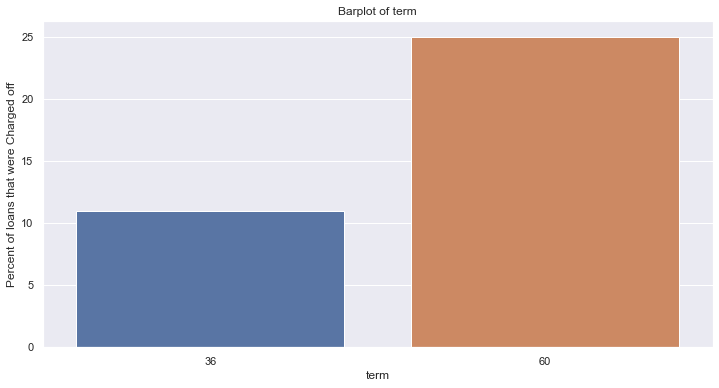

Plot Number :  2


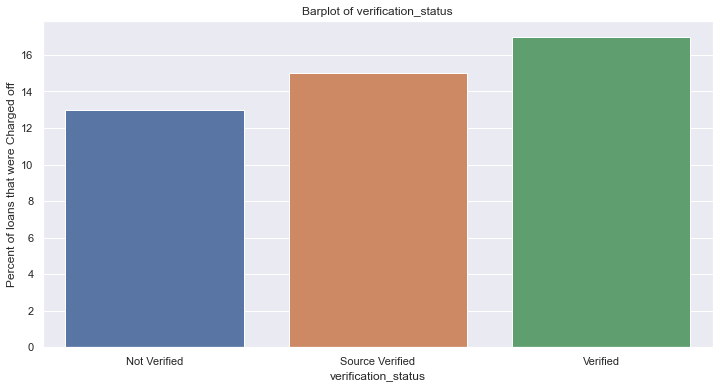

Plot Number :  3


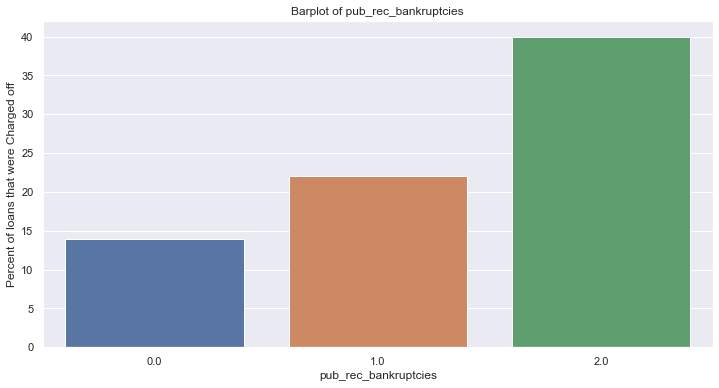

Plot Number :  4


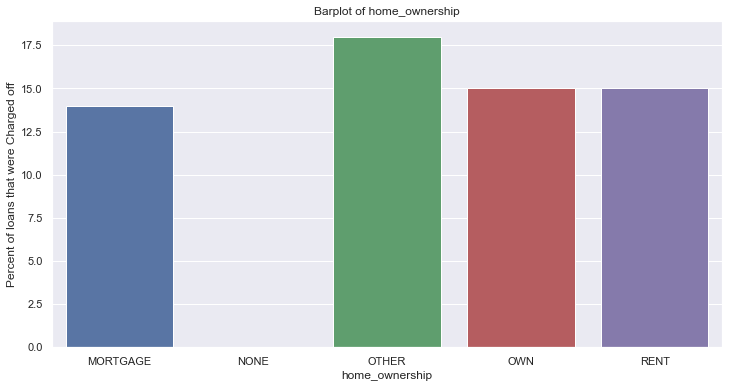

Plot Number :  5


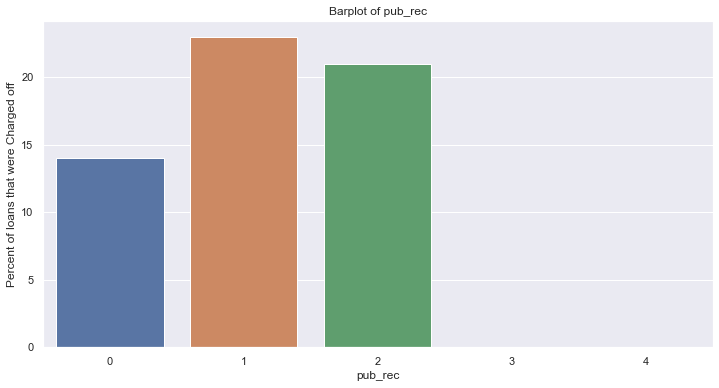

Plot Number :  6


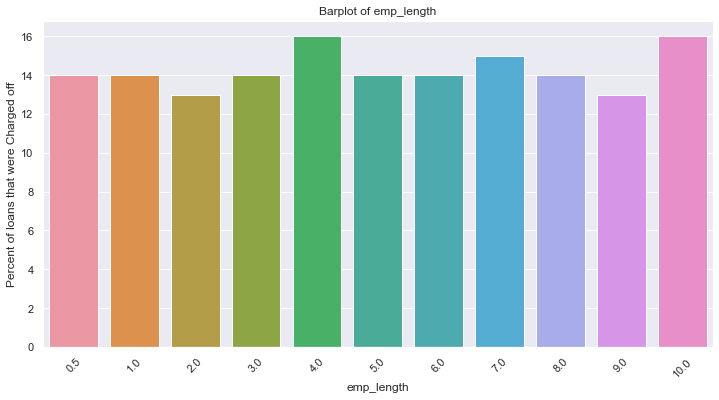

Plot Number :  7


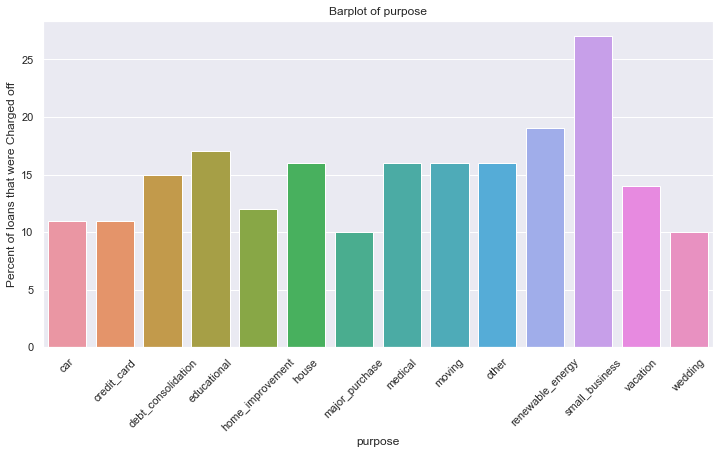

In [181]:
comp_list=['term','verification_status','pub_rec_bankruptcies','home_ownership','pub_rec','emp_length','purpose']
i=1
for col in comp_list:
    print("Plot Number : ",i)
    plotperc(col)
    i=i+1

#### Observations 
##### Plot No.1
* Loans that were taken for a longer term have a higher percent of deault
##### Plot No.2
* Loans that have an unverified source of income have the lowest percentage of Defaulters
##### Plot No.3
* People who file for backrupcy even once have a higher chance of defulting 
##### Plot No.4
* The barchart has no conclution as there is no significant difference in the known values, others is high but we dont know their status
##### Plot No.5
* People with a derogatory record have a higher tendecy of defulting as compared to someone without it 
##### Plot No.6
* People with work exp of 10 years or grater have the highest default percentage 
##### Plot No.5
* We can see that the loan default rates for the Small business, renewable energy and education are very high.These are the riskiest loans as per the data, while categories like wedding, car, credit card and major purchase are least risky loans for the company. 

With the above Charts we have seen the percentages but these can have a skewed results if the number of loans in the category have limited number
Lets have a look at the numbers to get a different perspective 

In [182]:
comp_list=['term','verification_status','pub_rec_bankruptcies','home_ownership','pub_rec','emp_length','purpose']
i = 1
for col in comp_list:
    x=plotperc(col,pvt=True,plot=False)
    print("Chart :",i)
    display(x)
    i=i+1

Chart : 1


loan_status,Charged Off,Fully Paid,perc
term,,,
36,3227,25869,11.0
60,2400,7081,25.0


Chart : 2


loan_status,Charged Off,Fully Paid,perc
verification_status,,,
Not Verified,2142,14552,13.0
Source Verified,1434,8243,15.0
Verified,2051,10155,17.0


Chart : 3


loan_status,Charged Off,Fully Paid,perc
pub_rec_bankruptcies,,,
0.0,5259,31676,14.0
1.0,366,1271,22.0
2.0,2,3,40.0


Chart : 4


loan_status,Charged Off,Fully Paid,perc
home_ownership,,,
MORTGAGE,2327,14694,14.0
NONE,0,3,0.0
OTHER,18,80,18.0
OWN,443,2532,15.0
RENT,2839,15641,15.0


Chart : 5


loan_status,Charged Off,Fully Paid,perc
pub_rec,,,
0,5160,31347,14.0
1,457,1556,23.0
2,10,38,21.0
3,0,7,0.0
4,0,2,0.0


Chart : 6


loan_status,Charged Off,Fully Paid,perc
emp_length,,,
0.5,639,3869,14.0
1.0,456,2713,14.0
2.0,567,3724,13.0
3.0,555,3457,14.0
4.0,690,3685,16.0
5.0,458,2736,14.0
6.0,307,1861,14.0
7.0,263,1448,15.0
8.0,203,1232,14.0


Chart : 7


loan_status,Charged Off,Fully Paid,perc
purpose,,,
car,160,1339,11.0
credit_card,542,4485,11.0
debt_consolidation,2767,15288,15.0
educational,56,269,17.0
home_improvement,347,2528,12.0
house,59,308,16.0
major_purchase,222,1928,10.0
medical,106,575,16.0
moving,92,484,16.0


#### What the numbers show
##### Chart No.1
* The number of loans of 36 months is significantly higher than that of 60 months but the no of charged off loans are very close so we can definitvely say loans of 60 months have a very high chance of defulting compared to 36 months 
##### Chart No.2
* The number of verified and Not verified source of income is similar enough to compare so our previous statment about the barplot can be concedred True
##### Chart No.3
* the number of people who have filed for bakrupcy are significantly lower so their comparison may yeild flase results
##### Chart No.5
* Less than 10% of the people have derogatory public records so analisys may be skewed
##### Chart No.6
* The employemnt lenth numbers are well distributed so our previous assumption is correct 
##### Chart No.7
* Leaving the Debt consolidation aside the other numbers are well distributed so our prevoius assumption holds true

Lets look at the interst rate, since it is a continues value looking at it in ranges will give us a clearer idea

In [183]:
px.histogram(Data_LC,x='int_rate',nbins=6,color='loan_status')

Lets breakdown the Interest rates into 4 categories 

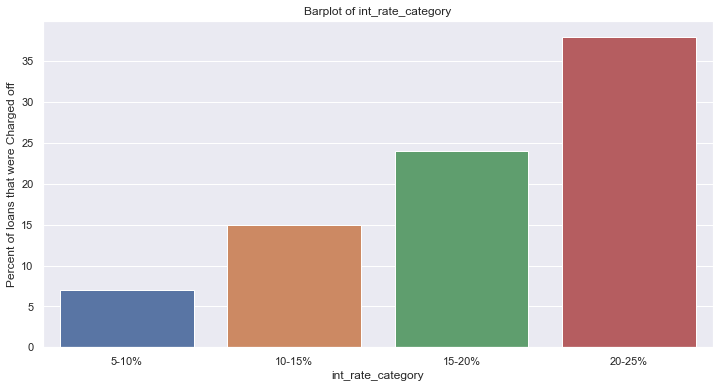

loan_status,Charged Off,Fully Paid,perc
int_rate_category,,,
5-10%,839,11542,7.0
10-15%,2629,15180,15.0
15-20%,1784,5613,24.0
20-25%,375,615,38.0


In [184]:
Data_LC['int_rate_category'] =  pd.cut(Data_LC['int_rate'], bins=4,precision =0,labels =['5-10%','10-15%','15-20%','20-25%'])
# We can now plot it using our custome function 
plotperc('int_rate_category',pvt=True)

**Observation:** 15-20% and 20-25% interest rate category has maximum default rate

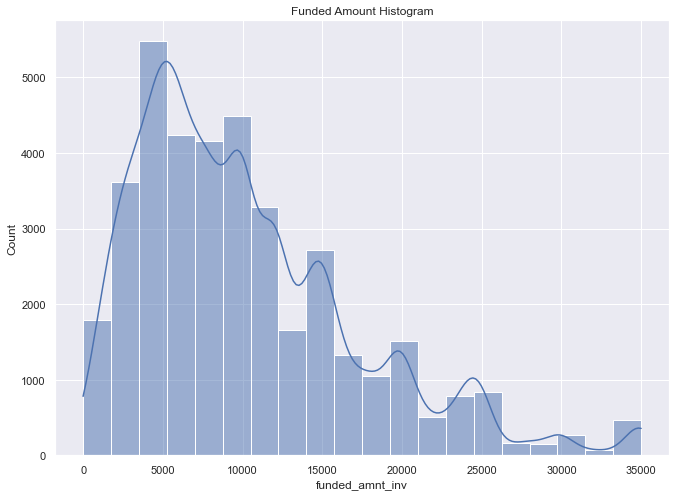

In [185]:
# Lets look at the funded amount 
sns.set(rc={'figure.figsize':(11,8)}) #Set standard figure size
sns.histplot(data = Data_LC, x = 'funded_amnt_inv',bins=20,kde = True)
plt.title("Funded Amount Histogram")
plt.show()

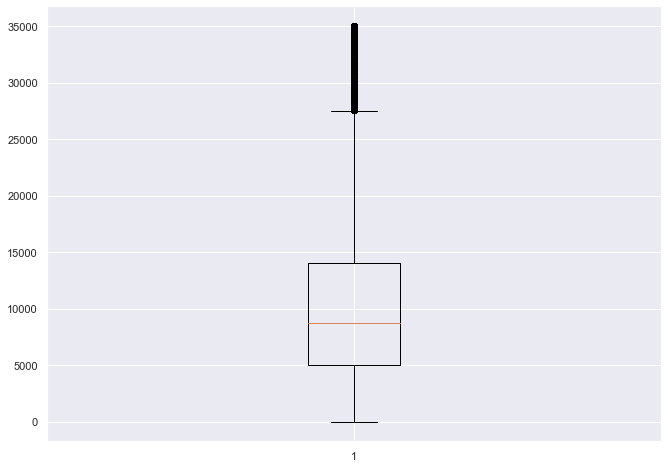

In [186]:
plt.boxplot(Data_LC.funded_amnt_inv)
plt.show()

Loans above 30,000 are outliers 

In [187]:
# Devide loan amount and income into catigories 
Data_LC['loan_amnt_category'] = pd.cut(Data_LC['funded_amnt_inv'], bins=7,precision =0,labels =['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k','>30k'])

def get_inc_category(x):
    if x['annual_inc'] <= 30000:
        return '<30k'
    elif x['annual_inc'] >30000 and x['annual_inc'] <=60000:
        return '30-60k'
    elif x['annual_inc'] >60000 and x['annual_inc'] <=90000:
        return '60-90k'
    elif x['annual_inc'] >90000 and x['annual_inc'] <=120000:
        return '90-120k'
    elif x['annual_inc'] >120000 and x['annual_inc'] <=150000:
        return '120-150k'
    elif x['annual_inc'] >150000 and x['annual_inc'] <=200000:
        return '150-200k'
    else:
        return '>200k'
    
Data_LC['annual_inc_category'] = Data_LC.apply(get_inc_category,axis =1)


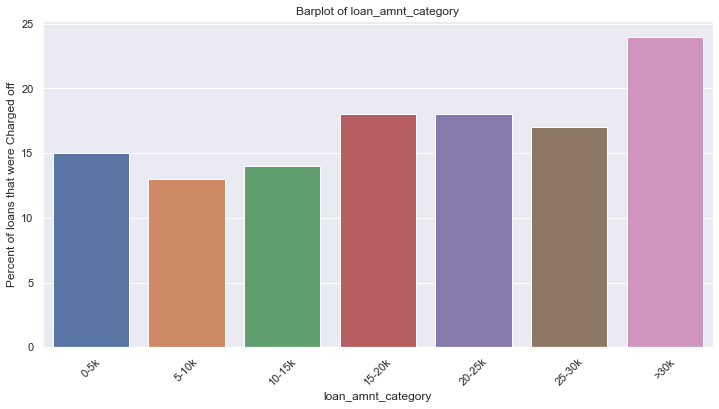

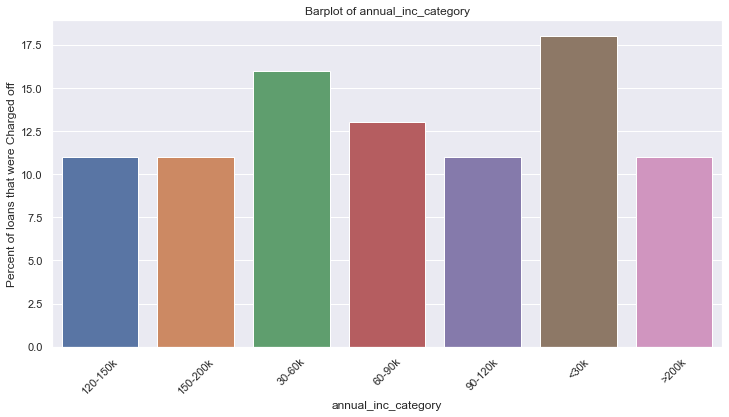

In [188]:
# lets plot these with our percentage function 
plotperc('loan_amnt_category')
plotperc('annual_inc_category')

##### Plot 1
**Observation:** There is a rise in charge off percentage for loans above 15K, higher>15k loan amounts are more likely to default
##### Plot 2
**Observation:** : The lower income groups have a higher chance of default .

In [189]:
# Lets bin the installments 
def get_instal_cat(x):
    if x.installment <=200:
        return '0-200'
    elif x.installment>200 and x.installment<=400:
        return '200-400'
    elif x.installment>400 and x.installment<=600:
        return '400-600'
    elif x.installment>600 and x.installment<=800:
        return '600-800'
    elif x.installment>800 and x.installment<=1000:
        return '800-1000'
    elif x.installment>1000 and x.installment<=1200:
        return '1000-1200'
    else:
        return '>1200'
    
Data_LC['installment_cat'] = Data_LC.apply(get_instal_cat, axis = 1)

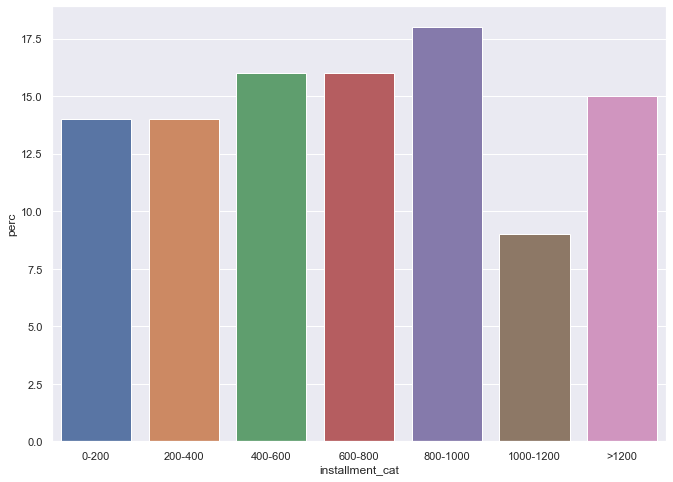

loan_status,Charged Off,Fully Paid,perc
installment_cat,,,
0-200,1813,11261,14.0
1000-1200,16,160,9.0
200-400,2062,12670,14.0
400-600,1048,5515,16.0
600-800,433,2204,16.0
800-1000,246,1090,18.0
>1200,9,50,15.0


In [190]:
# Plotting the instllments 
x1=plotperc('installment_cat',True,False)
sns.barplot(data = x1, x =x1.index, y = x1.perc,
           order = ['0-200','200-400','400-600','600-800','800-1000','1000-1200','>1200'])
plt.show()
x1

In [191]:
def stateper(colname):
    st_data=pd.DataFrame(Data_LC.groupby(by='addr_state')[colname].mean())
    st_data[colname]=st_data[colname].apply(lambda x: round(x,0))
    plt.figure(figsize=(20,8))
    plt.plot(st_data.index,st_data[colname])
    sns.barplot(x='addr_state',y=colname ,data=Data_LC[Data_LC.loan_status=='Charged Off'])
    plt.xlabel("States")
    plt.xticks(rotation=90)
    plt.title("This Chart shows us the "+colname+" Per state of charged off and the line shows the state avg")
    plt.show()
    

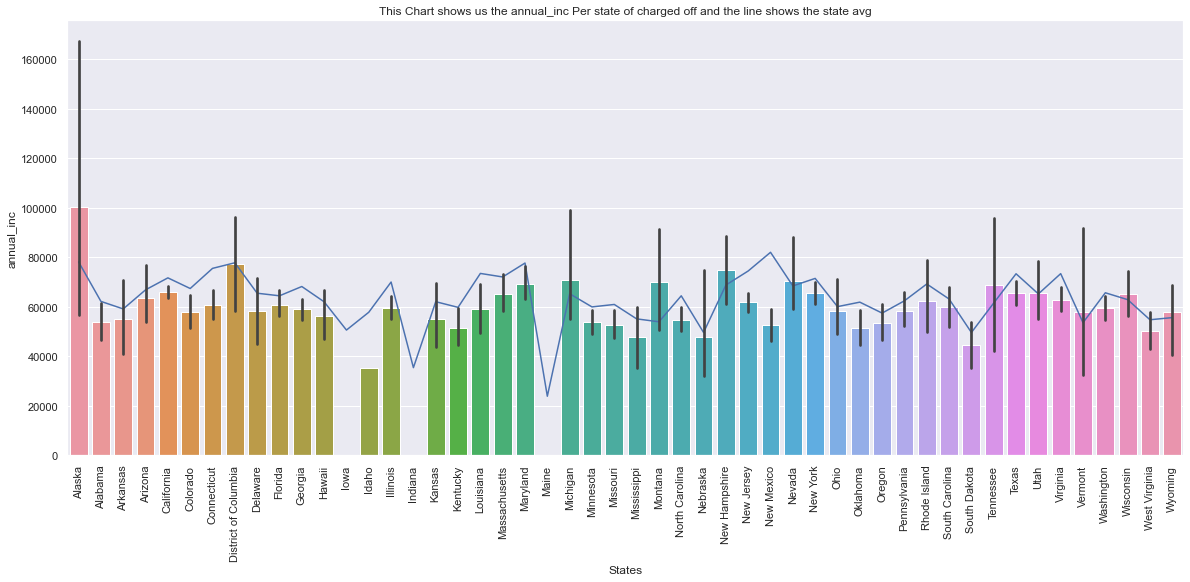

In [192]:
stateper('annual_inc')

**Observation:** This chart shows us that the charged off cases usualy have annual income lower than the state avg

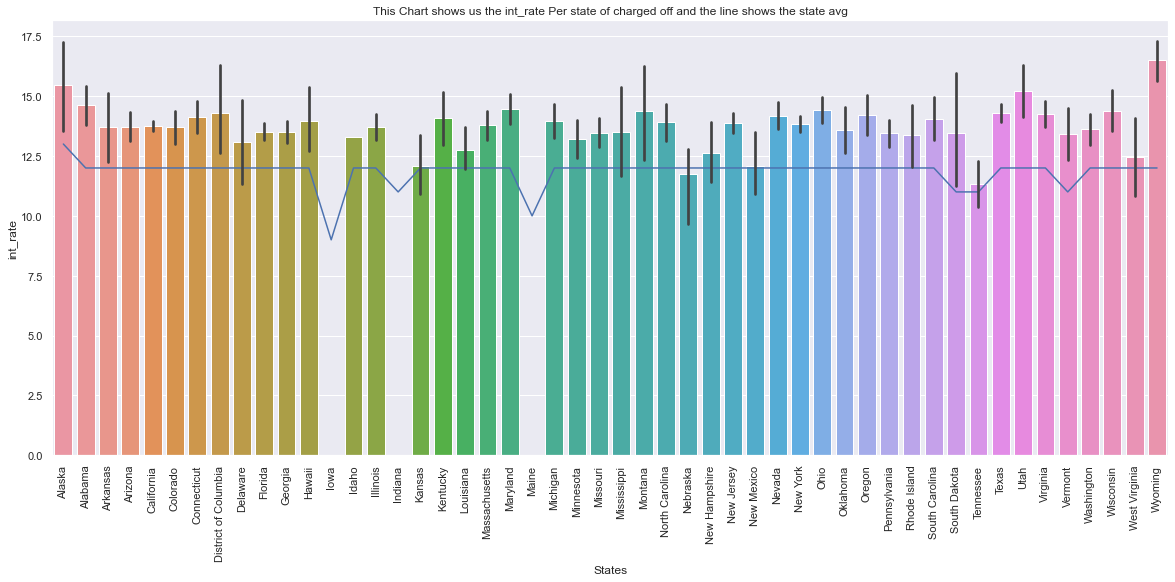

In [193]:
stateper('int_rate')

**Obseravtion:** The intresest rates that are higher than the avg tend to have a higher default rate . 

<AxesSubplot:xlabel='term', ylabel='annual_inc'>

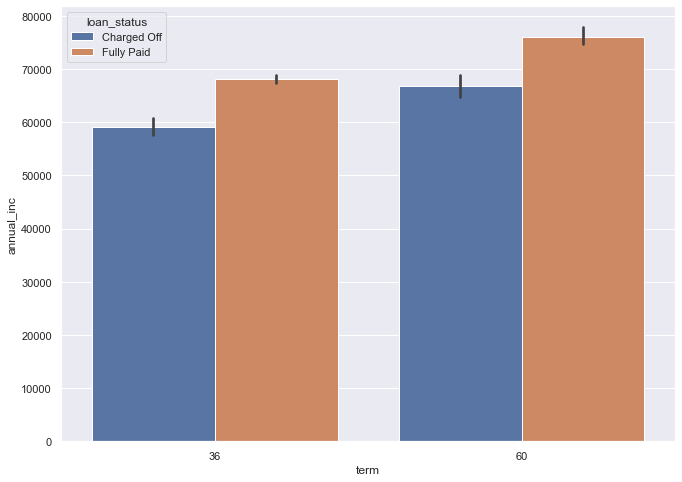

In [194]:
sns.barplot(data = Data_LC, x = Data_LC.term, y = Data_LC.annual_inc,hue = Data_LC.loan_status)

**Observation:** Average Annual income of 36 months loan defaulters is around 59K and 60 months loan defaulters is 68k

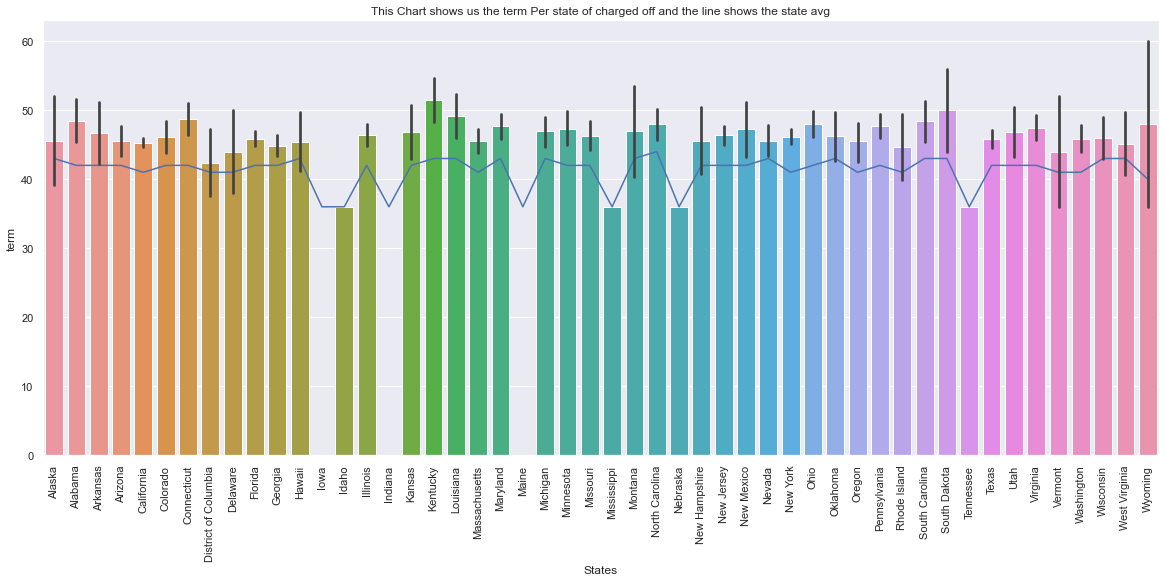

In [195]:
stateper('term')

**Observation:** Clearly, all the states are following the same trend and in most of the states the 60 month loans are resulting in charge off at almost double the rate. As the avg term of defult is much higher than 36 and the state avg